In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test = df_test.rename(columns={"num       ":"num"})
list_df = [df, df_test]

In [105]:
df_combine = df.append(df_test)
df_combine.reset_index(drop=True, inplace=True)

In [106]:
print(df_combine.shape)
df_combine = df_combine[df_combine.chol != '?']
df_combine = df_combine[df_combine.exang != '?']

df_combine.isin(['?']).sum(axis=0)

(1289, 14)


age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope       1177
ca          1276
thal        1251
num            0
dtype: int64

In [107]:
df.isin(['?']).sum(axis=0)

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope       1129
ca          1197
thal        1181
num            0
dtype: int64

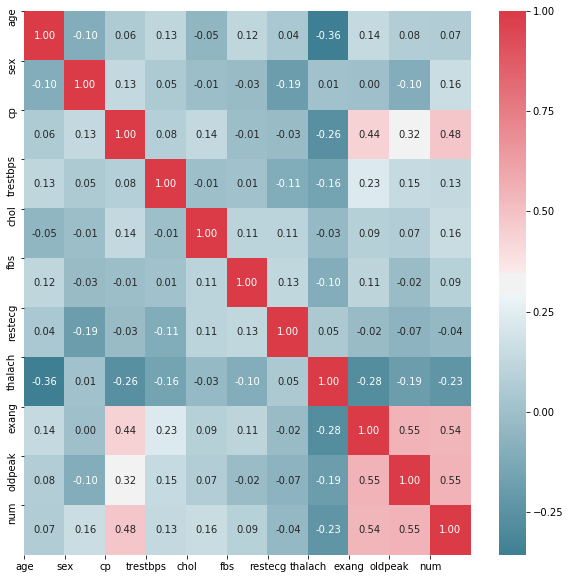

In [108]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(df)

In [109]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,47.910833,0.698333,2.721667,129.815000,249.160000,0.065000,0.200000,142.545000,0.192500,0.379167,0.166667
std,6.912383,0.459173,0.851353,13.626402,56.504927,0.246629,0.441772,20.020414,0.394428,0.678810,0.372833
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000
25%,43.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,130.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,129.000000,250.000000,0.000000,0.000000,144.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,3.000000,140.000000,277.000000,0.000000,0.000000,157.000000,0.000000,1.000000,0.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,188.000000,1.000000,3.000000,1.000000


In [110]:
# df = df.drop(columns=['slope', 'ca', 'thal'])
# df.info()

In [111]:
# for i in df.columns:
#     print('\nAttribute-',i,':',df[i].dtypes)
#     Q1=df[i].quantile(0.25)
#     print('Q1',Q1)
#     Q3=df[i].quantile(0.75)
#     print('Q3',Q3)
#     IQR=Q3-Q1
#     print('IQR',IQR)
#     min_val=df[i].min()
#     max_val=df[i].max()
#     min_IQR=Q1-1.5*IQR
#     max_IQR=Q3+1.5*IQR 
#     if (min_val<min_IQR): 
#         print('Low outlier is found') 
#     if (max_val>max_IQR): 
#         print('High outlier is found')

In [112]:
# df.shape

In [113]:
# Q1=df['chol'].quantile(0.25)
# Q3=df['chol'].quantile(0.75)
# IQR=Q3-Q1
# min_val=df['chol'].min()
# max_val=df['chol'].max()
# min_IQR=Q1-1.5*IQR
# max_IQR=Q3+1.5*IQR 
# df = df[df.chol > min_IQR]
# df = df[df.chol < max_IQR]
# df.shape

In [114]:
y = df['num']
X = df.drop(columns=['slope', 'ca', 'thal', 'num'])
# X = df.drop(columns=['num'])

y_combine = df_combine['num']
X_combine = df_combine.drop(columns=['slope', 'ca', 'thal', 'num'])

In [115]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_train, y_train = ros.fit_resample(X, y)
# print(pd.Series(y_train).value_counts())

# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# X_train, y_train = cc.fit_resample(X, y)
# print(pd.Series(y_train).value_counts())

# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)
# X_train, y_train = smote_enn.fit_resample(X, y)
# print(pd.Series(y_train).value_counts())


from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_train, y_train = smote_tomek.fit_resample(X, y)
print(pd.Series(y_train).value_counts())


1    998
0    998
dtype: int64


In [116]:
# X_train = X.values
# y_train = y.values

X_train_combine = X_combine.values
y_train_combine = y_combine.values

In [117]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

def purity_score(y_truth, y_predicted):
    labels = np.zeros_like(y_predicted)
    for i in range(2):
        mask = (y_predicted == i)
        labels[mask] = mode(y_truth[mask])[0]
    return accuracy_score(y_truth, labels)

## KMEANS

In [118]:
from sklearn.cluster import KMeans

In [119]:
kmeans = KMeans(2, random_state=1)
kmeans_combine = KMeans(2, random_state=1)

In [120]:
kmeans.fit(X_train)
kmeans_combine.fit(X_train_combine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [121]:
print("Predicted label Train model only : ", kmeans.labels_)
print("Purity Score Train model only : ", recall_score(y_train, kmeans.labels_, average=None))

print()

print("Predicted label Combine model : ", kmeans_combine.labels_)
print("Purity Score Combine model : ", purity_score(y_train_combine, kmeans_combine.labels_))

Predicted label Train model only :  [1 1 1 ... 1 0 0]
Purity Score Train model only :  [0.10721443 0.83466934]

Predicted label Combine model :  [0 0 0 ... 0 0 0]
Purity Score Combine model :  0.8232994526974199


## Agglomerative

In [122]:
from sklearn.cluster import AgglomerativeClustering

In [123]:
agg = AgglomerativeClustering(2, linkage="ward")
agg.fit(X_train)

agg_combine = AgglomerativeClustering(2, linkage="ward")
agg_combine.fit(X_train_combine)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [124]:
print("Predicted label Train model only : ", agg.labels_)
print("Purity Score Train model only : ", recall_score(y_train, agg.labels_, average=None))

print()

print("Predicted label Combine model : ", agg_combine.labels_)
print("Purity Score Combine model : ", purity_score(y_train_combine, agg_combine.labels_))

Predicted label Train model only :  [1 1 0 ... 1 0 0]
Purity Score Train model only :  [0.55811623 0.35170341]

Predicted label Combine model :  [1 1 1 ... 1 1 1]
Purity Score Combine model :  0.8232994526974199


## DBSCAN

In [125]:
from sklearn.cluster import DBSCAN

In [126]:
dbscan_model = DBSCAN(min_samples=2, eps=0.5)
dbscan_model.fit(X_train)

dbscan_model_combine = DBSCAN(min_samples=2, eps=0.5)
dbscan_model_combine.fit(X_train_combine)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [127]:
print("Predicted label Train model only : ", dbscan_model.labels_)
print("Purity Score Train model only : ", purity_score(y_train, dbscan_model.labels_))

print()

print("Predicted label Combine model : ", dbscan_model_combine.labels_)
print("Purity Score Combine model : ", purity_score(y_train_combine, dbscan_model_combine.labels_))

Predicted label Train model only :  [-1 -1 -1 ... -1 -1 -1]
Purity Score Train model only :  0.5

Predicted label Combine model :  [-1 -1 -1 ... -1 -1 -1]
Purity Score Combine model :  0.8232994526974199
